In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.utils import shuffle

# 1. Regression

### 1. Make Data

In [2]:
N = 20
Ntrain = 12

# create the data
X = np.linspace(0, 2*np.pi, N).reshape(N, 1)
Y = np.sin(3*X)
X, Y = shuffle(X, Y)

Xtrain = X[:Ntrain]
Ytrain = Y[:Ntrain]

### 2. Low Bias and HIgh Variance

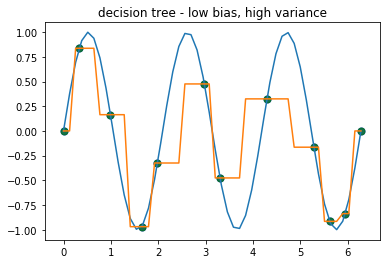

In [9]:
# decision tree - low bias, high variance
model = DecisionTreeRegressor() # default max_depth=None
model.fit(Xtrain, Ytrain)

T = 50
Xaxis = np.linspace(0, 2*np.pi, T)
Yaxis = np.sin(3*Xaxis)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.title("decision tree - low bias, high variance")
# plt.show()

# plt.scatter(X, Y)
# plt.scatter(X, model.predict(X.reshape(N, 1)))
# plt.show()

plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.show()

### 3. High Bias, Low Variance

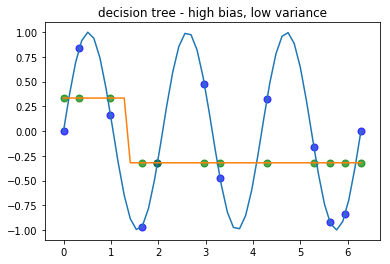

In [13]:
# decision tree - high bias, low variance
model = DecisionTreeRegressor(max_depth=1)
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("decision tree - high bias, low variance")
plt.show()

## 2. Classification

### 1. Data

In [16]:
# generate the data
N = 100
D = 2
X = np.random.randn(N, D)
X[:N//2] += np.array([1, 1]) # center it at (1,1)
X[N//2:] += np.array([-1, -1]) # center it at (-1, -1)

Y = np.array([0]*(N//2) + [1]*(N//2))

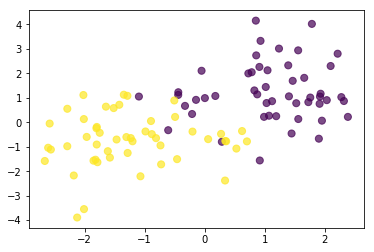

In [18]:
def plot_decision_boundary(X, model):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


# look at the data
plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plt.show()

### 2. Low Bias, High Variance

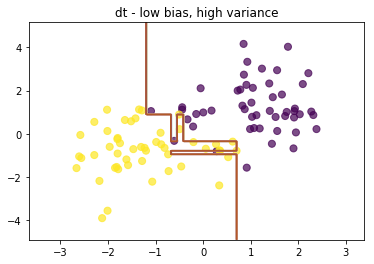

In [20]:
# dt - low bias, high variance
model = DecisionTreeClassifier()
model.fit(X, Y)

plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(X, model)
plt.title("dt - low bias, high variance")
plt.show()

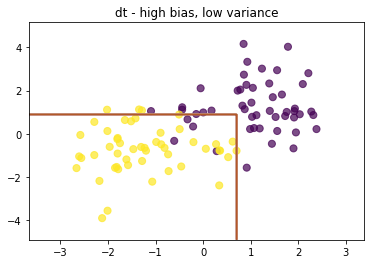

In [21]:
# dt - high bias, low variance
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, Y)

plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(X, model)
plt.title("dt - high bias, low variance")
plt.show()